In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import random
import math
import os
from sklearn.model_selection import KFold


import plotly.graph_objects as go
import warnings
warnings.simplefilter('ignore', np.RankWarning)
MAX_DEGREE = 10
FOLDS = 10

def CalculateMSE_poly(x_positions, y_positions, w_list):
    """CalculateMSE for polynomial regression model"""
    x = np.array(x_positions)
    n = len(x_positions)
    MSE = 0
    for i in range(0, n):
        wx = 0
        for j in range(len(w_list)):
            wx += w_list[j] * x[i]**(len(w_list)-j-1)
        MSE += (wx - y_positions[i]) ** 2
    MSE *= 1/(n)
    return MSE

def generate_feature_matrix(x, degree):
    if degree == 0:
        X = np.ones((len(x), 1))
        return X
    elif degree == 1:
        X = np.column_stack((np.ones(len(x)), x))
        return X
    elif degree > 1:
        X_poly = np.column_stack([x ** d for d in range(0, degree+1)])
        return X_poly
    else:
        raise ValueError("Degree must be a non-negative integer.")
    
def CalculateMSE(x_positions, y_positions, w_list):
    n = len(x_positions)
    x_positions = generate_feature_matrix(x_positions,len(w_list)-1)
    MSE = 0
    for i in range(0, n):
        wx = np.dot(x_positions[i],np.flip(w_list)) #x_positon is array 1 x len(w_list) dimension Ex. [ 1 , x^1 , x^2 , ..... , x^n]
        MSE += (wx - y_positions[i]) ** 2

        
    MSE *= 1/(n)
    # print("new",MSE)
    return MSE

def cross_validation(X, y, folds, degree):
    #Not done
    k_folds = KFold(n_splits=folds)
    
    avg_rmse = []
    for train_index, validate_index in k_folds.split(X):
        # print(train_index,validate_index)
        X_train , X_validate = X.iloc[train_index], X.iloc[validate_index]
        y_train , y_validate = y.iloc[train_index], y.iloc[validate_index]

        result = np.polyfit(X_train.values.flatten(), np.array(y_train), degree)
        
        avg_rmse.append(CalculateMSE(X_validate.values.flatten(), np.array(y_validate), result)**(1/2))
        #avg_rmse.append(CalculateMSE_poly(X_validate.values.flatten(), np.array(y_validate), result))
    return np.mean(avg_rmse)

def polynomial_predictions(x, w):
    degree = len(w) - 1
    y_pred = np.zeros_like(x)
    for i in range(degree + 1):
        y_pred += w[i] * (x ** (degree - i))
    return y_pred

def model_plot(x, y, w_list):
    fig = go.Figure()
    x_range = np.linspace(min(x), max(x), 100)

    for i, w in enumerate(w_list):
        y_pred = polynomial_predictions(x_range, w)
        label = f'Polynomial degree {i+1}'
        fig.add_trace(go.Scatter(x=x_range, y=y_pred, mode='lines', name=label))

    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Data Points', marker=dict(color='blue')))
    #y_sin = [math.sin(math.pi*x) for x in x_range]
    #fig.add_trace(go.Scatter(x=x_range, y=y_sin, mode='lines', name="sin"))

    fig.update_layout(
        title=f'Data and Polynomial Regression {len(x)} Samples',
        xaxis_title='X',
        yaxis_title='Y',
        showlegend=True,
        width=1000,
        height=600
    )

    fig.show()

def model_plot2(x, y, w_list, line_label_list, y_lim=None):
    """Model_plot but can fix y limit and rename label"""
    fig = go.Figure()

    if y_lim != None:
        fig.update_layout(yaxis_range=y_lim)

    x_range = np.linspace(min(x), max(x), 100)

    for i, w in enumerate(w_list):
        y_pred = polynomial_predictions(x_range, w)
        label = f'Polynomial degree {i+1}'
        fig.add_trace(go.Scatter(x=x_range, y=y_pred, mode='lines', name=line_label_list[i]))

    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Data Points', marker=dict(color='blue')))
    #y_sin = [math.sin(math.pi*x) for x in x_range]
    #fig.add_trace(go.Scatter(x=x_range, y=y_sin, mode='lines', name="sin"))

    fig.update_layout(
        title=f'Data and Polynomial Regression {len(x)} Samples',
        xaxis_title='X',
        yaxis_title='Y',
        showlegend=True,
        width=1000,
        height=600
    )

    fig.show()

# 1. ทดลองซ้ำและการปรับพารามิเตอร์ให้มากกว่าใน lecture หรือลอง generate date ที่แตกต่างจากที่เรียน

## Sin

### Training set

Noiseless

In [2]:
# sin noiseless 10 sample
print("sin noiseless 10 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_10sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["y"],w_list)

sin noiseless 10 sample
Degree = 1 | RMSE = 0.4615
Degree = 2 | RMSE = 0.4100
Degree = 3 | RMSE = 0.0729
Degree = 4 | RMSE = 0.0493
Degree = 5 | RMSE = 0.0040
Degree = 6 | RMSE = 0.0019
Degree = 7 | RMSE = 0.0001
Degree = 8 | RMSE = 0.0000
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


In [3]:
# sin noiseless 20 sample
print("sin noiseless 20 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_20sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["y"],w_list)

sin noiseless 20 sample
Degree = 1 | RMSE = 0.4475
Degree = 2 | RMSE = 0.4347
Degree = 3 | RMSE = 0.0686
Degree = 4 | RMSE = 0.0619
Degree = 5 | RMSE = 0.0044
Degree = 6 | RMSE = 0.0036
Degree = 7 | RMSE = 0.0002
Degree = 8 | RMSE = 0.0001
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


In [4]:
# sin noiseless 40 sample
print("sin noiseless 40 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_40sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["y"],w_list)

sin noiseless 40 sample
Degree = 1 | RMSE = 0.4440
Degree = 2 | RMSE = 0.4407
Degree = 3 | RMSE = 0.0669
Degree = 4 | RMSE = 0.0652
Degree = 5 | RMSE = 0.0044
Degree = 6 | RMSE = 0.0041
Degree = 7 | RMSE = 0.0002
Degree = 8 | RMSE = 0.0001
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


In [5]:
# sin noiseless 80 sample
print("sin noiseless 80 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_80sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["y"],w_list)

sin noiseless 80 sample
Degree = 1 | RMSE = 0.4431
Degree = 2 | RMSE = 0.4423
Degree = 3 | RMSE = 0.0664
Degree = 4 | RMSE = 0.0660
Degree = 5 | RMSE = 0.0043
Degree = 6 | RMSE = 0.0043
Degree = 7 | RMSE = 0.0002
Degree = 8 | RMSE = 0.0002
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


Noisy

In [35]:
# sin noisy 10 sample
print("sin noisy 10 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_10sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["noisy_y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["noisy_y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["noisy_y"],w_list)

sin noisy 10 sample
Degree = 1 | RMSE = 0.5728
Degree = 2 | RMSE = 0.4298
Degree = 3 | RMSE = 0.2265
Degree = 4 | RMSE = 0.2246
Degree = 5 | RMSE = 0.2081
Degree = 6 | RMSE = 0.1063
Degree = 7 | RMSE = 0.0865
Degree = 8 | RMSE = 0.0607
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0000


In [36]:
# sin noisy 20 sample
print("sin noisy 20 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_20sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["noisy_y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["noisy_y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["noisy_y"],w_list)

sin noisy 20 sample
Degree = 1 | RMSE = 0.4316
Degree = 2 | RMSE = 0.4137
Degree = 3 | RMSE = 0.2720
Degree = 4 | RMSE = 0.2611
Degree = 5 | RMSE = 0.2595
Degree = 6 | RMSE = 0.2341
Degree = 7 | RMSE = 0.1976
Degree = 8 | RMSE = 0.1936
Degree = 9 | RMSE = 0.1933
Degree = 10 | RMSE = 0.1563


In [37]:
# sin noisy 40 sample
print("sin noisy 40 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_40sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["noisy_y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["noisy_y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["noisy_y"],w_list)

sin noisy 40 sample
Degree = 1 | RMSE = 0.5445
Degree = 2 | RMSE = 0.5388
Degree = 3 | RMSE = 0.2929
Degree = 4 | RMSE = 0.2908
Degree = 5 | RMSE = 0.2900
Degree = 6 | RMSE = 0.2900
Degree = 7 | RMSE = 0.2897
Degree = 8 | RMSE = 0.2718
Degree = 9 | RMSE = 0.2709
Degree = 10 | RMSE = 0.2707


In [38]:
# sin noisy 80 sample
print("sin noisy 80 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_80sample.csv")

w_list = []
for degree in range(1, MAX_DEGREE+1):
    w = np.polyfit(df["x"], df["noisy_y"], degree)
    w_list.append(w)
    RMSE = CalculateMSE_poly(df["x"], df["noisy_y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')
model_plot(df["x"],df["noisy_y"],w_list)

sin noisy 80 sample
Degree = 1 | RMSE = 0.4990
Degree = 2 | RMSE = 0.4970
Degree = 3 | RMSE = 0.2737
Degree = 4 | RMSE = 0.2733
Degree = 5 | RMSE = 0.2628
Degree = 6 | RMSE = 0.2593
Degree = 7 | RMSE = 0.2589
Degree = 8 | RMSE = 0.2578
Degree = 9 | RMSE = 0.2563
Degree = 10 | RMSE = 0.2531


### Cross-validation 10-folds

Noiseless

In [42]:
# sin noiseless 10 sample
print("sin noiseless 10 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_10sample.csv")

for degree in range(0, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noiseless 10 sample
Degree = 0 | RMSE = 0.6839
Degree = 1 | RMSE = 0.5104
Degree = 2 | RMSE = 0.6102
Degree = 3 | RMSE = 0.1366
Degree = 4 | RMSE = 0.1645
Degree = 5 | RMSE = 0.0228
Degree = 6 | RMSE = 0.0258
Degree = 7 | RMSE = 0.0029
Degree = 8 | RMSE = 0.0029
Degree = 9 | RMSE = 0.0525
Degree = 10 | RMSE = 0.0493


In [43]:
# sin noiseless 20 sample
print("sin noiseless 20 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_20sample.csv")

for degree in range(0, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noiseless 20 sample
Degree = 0 | RMSE = 0.7194
Degree = 1 | RMSE = 0.5126
Degree = 2 | RMSE = 0.6437
Degree = 3 | RMSE = 0.1051
Degree = 4 | RMSE = 0.1744
Degree = 5 | RMSE = 0.0121
Degree = 6 | RMSE = 0.0226
Degree = 7 | RMSE = 0.0012
Degree = 8 | RMSE = 0.0021
Degree = 9 | RMSE = 0.0001
Degree = 10 | RMSE = 0.0001


In [44]:
# sin noiseless 40 sample
print("sin noiseless 40 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_40sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noiseless 40 sample
Degree = 1 | RMSE = 0.5145
Degree = 2 | RMSE = 0.6514
Degree = 3 | RMSE = 0.1023
Degree = 4 | RMSE = 0.1769
Degree = 5 | RMSE = 0.0084
Degree = 6 | RMSE = 0.0228
Degree = 7 | RMSE = 0.0007
Degree = 8 | RMSE = 0.0020
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0001


In [45]:
# sin noiseless 80 sample
print("sin noiseless 80 sample")
df = pd.read_csv("data/sin experiment/sin_noiseless_80sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noiseless 80 sample
Degree = 1 | RMSE = 0.5151
Degree = 2 | RMSE = 0.6534
Degree = 3 | RMSE = 0.1017
Degree = 4 | RMSE = 0.1775
Degree = 5 | RMSE = 0.0073
Degree = 6 | RMSE = 0.0229
Degree = 7 | RMSE = 0.0005
Degree = 8 | RMSE = 0.0020
Degree = 9 | RMSE = 0.0000
Degree = 10 | RMSE = 0.0001


Noisy

In [46]:
# sin noisy 10 sample
print("sin noisy 10 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_10sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noisy 10 sample
Degree = 1 | RMSE = 0.5861
Degree = 2 | RMSE = 0.6147
Degree = 3 | RMSE = 0.3355
Degree = 4 | RMSE = 0.4839
Degree = 5 | RMSE = 1.1152
Degree = 6 | RMSE = 0.8412
Degree = 7 | RMSE = 2.4347
Degree = 8 | RMSE = 9.8027
Degree = 9 | RMSE = 8.5591
Degree = 10 | RMSE = 12.8773


In [47]:
# sin noisy 20 sample
print("sin noisy 20 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_20sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noisy 20 sample
Degree = 1 | RMSE = 0.4783
Degree = 2 | RMSE = 0.5599
Degree = 3 | RMSE = 0.3315
Degree = 4 | RMSE = 0.3154
Degree = 5 | RMSE = 0.4735
Degree = 6 | RMSE = 0.9586
Degree = 7 | RMSE = 1.0984
Degree = 8 | RMSE = 0.5742
Degree = 9 | RMSE = 5.2160
Degree = 10 | RMSE = 14.0502


In [48]:
# sin noisy 40 sample
print("sin noisy 40 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_40sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noisy 40 sample
Degree = 1 | RMSE = 0.5745
Degree = 2 | RMSE = 0.7212
Degree = 3 | RMSE = 0.2827
Degree = 4 | RMSE = 0.2909
Degree = 5 | RMSE = 0.2899
Degree = 6 | RMSE = 0.3261
Degree = 7 | RMSE = 0.9503
Degree = 8 | RMSE = 0.8057
Degree = 9 | RMSE = 1.4403
Degree = 10 | RMSE = 4.0169


In [49]:
# sin noisy 80 sample
print("sin noisy 80 sample")
df = pd.read_csv("data/sin experiment/sin_noisy_80sample.csv")

for degree in range(1, MAX_DEGREE+1):
    RMSE = cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE = {RMSE:.4f}')

sin noisy 80 sample
Degree = 1 | RMSE = 0.5706
Degree = 2 | RMSE = 0.7073
Degree = 3 | RMSE = 0.2987
Degree = 4 | RMSE = 0.3339
Degree = 5 | RMSE = 0.4314
Degree = 6 | RMSE = 0.4962
Degree = 7 | RMSE = 0.5300
Degree = 8 | RMSE = 0.4009
Degree = 9 | RMSE = 1.2536
Degree = 10 | RMSE = 0.7520


### Degree of polynomial

Degree 8

In [50]:
import os

data_path = os.path.abspath("data/sin experiment/")
filenames = ['sin_noiseless_10sample.csv',
             'sin_noisy_10sample.csv',
             'sin_noiseless_80sample.csv',
             'sin_noisy_80sample.csv']
print(filenames)

['sin_noiseless_10sample.csv', 'sin_noisy_10sample.csv', 'sin_noiseless_80sample.csv', 'sin_noisy_80sample.csv']


In [51]:
FOLDS = 10
MAX_DEGREE = 10

def E_LineScatterPlot( E_in , E_out , X , name ):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
    x= X,
    y= E_out,
    name= "E_out" ) )

    fig.add_trace(go.Scatter(
    x= X,
    y= E_in,
    name= "E_in" ) )

    fig.update_layout(
        title= name,
        xaxis_title='Degree',
        yaxis_title='RMSE',
        showlegend=True,
        width=1000,
        height=600
    )
    return fig


In [52]:

filenames = "sin_noiseless_80sample.csv"
df = pd.read_csv("data/sin experiment/"+ filenames)

E = {"E_out":[] , "E_in":[]}
for degree in range(0, MAX_DEGREE+1):
    #CrossValidation
    E["E_out"].append(cross_validation(df[["x"]], df["y"], FOLDS, degree))
    #TrainingData
    w = np.polyfit(df[["x"]].values.flatten() , np.array(df["y"]) , degree )
    E["E_in"].append(CalculateMSE(df[["x"]].values.flatten(),np.array(df["y"]),w)**(1/2))
    
    #print(f'Degree = {degree} | E_out = {E["E_out"][degree]} ; E_in = {E["E_in"][degree]}')
#print(type(E["E_out"]))
E_LineScatterPlot(E["E_in"] , E["E_out"] , list(range(0,MAX_DEGREE+1)) , filenames[:-4])



In [53]:
filenames = "sin_noisy_80sample.csv"
df = pd.read_csv("data/sin experiment/"+ filenames)

E = {"E_out":[] , "E_in":[]}
for degree in range(0, MAX_DEGREE+1):
    #CrossValidation
    E["E_out"].append(cross_validation(df[["x"]], df["noisy_y"], FOLDS, degree))
    #TrainingData
    w = np.polyfit(df[["x"]].values.flatten() , np.array(df["noisy_y"]) , degree )
    E["E_in"].append(CalculateMSE(df[["x"]].values.flatten(),np.array(df["noisy_y"]),w)**(1/2))
    
    #print(f'Degree = {degree} | E_out = {E["E_out"][degree]} ; E_in = {E["E_in"][degree]}')
#print(type(E["E_out"]))
E_LineScatterPlot(E["E_in"] , E["E_out"] , list(range(0,MAX_DEGREE+1)) , filenames[:-4])

In [54]:
filenames = ["sin_noiseless_10sample.csv", "sin_noisy_10sample.csv","sin_noiseless_80sample.csv","sin_noisy_80sample.csv"]
DEGREE = 8
for filename in filenames:
    df = pd.read_csv(os.path.join(data_path, filename))
    x = df["x"]
    if "noiseless" in filename:
        y = df["y"]
    else:
        y = df["noisy_y"]
    w_list = np.polyfit(x, y, DEGREE)
    print(filename)
    for i in range(len(w_list)):
        print(f'w{len(w_list)-i-1} = {w_list[i]}')

sin_noiseless_10sample.csv
w8 = -0.06060758076018083
w7 = -0.50490066873101
w6 = 0.06987697546470001
w5 = 2.5145546136131225
w4 = -0.02343873405588485
w3 = -5.162967171678592
w2 = 0.0023157471002371185
w1 = 3.141426952727912
w0 = -3.2424480295394385e-05
sin_noisy_10sample.csv
w8 = 50.548735119046874
w7 = 55.624580561390566
w6 = -67.42238562091397
w5 = -67.3316891339862
w4 = 31.28377246731989
w3 = 20.005274242709728
w2 = -5.103436445090841
w1 = 1.0153093278290355
w0 = 0.19991948169477525
sin_noiseless_80sample.csv
w8 = -0.007111079943956838
w7 = -0.4470925116709467
w6 = 0.011657465246353306
w5 = 2.4489018401935576
w4 = -0.005801381272460339
w3 = -5.142470166197959
w2 = 0.0008883286192674758
w1 = 3.139903684534767
w0 = -2.009441740590603e-05
sin_noisy_80sample.csv
w8 = -5.114453242901625
w7 = -1.9940947484381693
w6 = 11.602988567062532
w5 = 5.23555338321505
w4 = -8.025492699592679
w3 = -6.425554396244983
w2 = 1.7580369948824792
w1 = 3.120674232578604
w0 = -0.12660757767855205


Degree 3

In [55]:
DEGREE = 3
for filename in filenames:
    df = pd.read_csv(os.path.join(data_path, filename))
    x = df["x"]
    if "noiseless" in filename:
        y = df["y"]
    else:
        y = df["noisy_y"]
    w_list = np.polyfit(x, y, DEGREE)
    print(filename)
    for i in range(len(w_list)):
        print(f'w{len(w_list)-i-1} = {w_list[i]}')

sin_noiseless_10sample.csv
w3 = -2.8697619978632463
w2 = -0.13231033799533642
w1 = 2.6739426976301477
w0 = 0.025403584895104914
sin_noisy_10sample.csv
w3 = -2.5979652292152293
w2 = 0.5232430069930084
w1 = 2.7772163947163957
w0 = 0.010752494172494369
sin_noiseless_80sample.csv
w3 = -2.8952277678024156
w2 = -0.019022458878651644
w1 = 2.6919727946840153
w0 = 0.003802113968370446
sin_noisy_80sample.csv
w3 = -2.7468770339525332
w2 = 0.04908607141057977
w1 = 2.488370683192111
w0 = -0.0751959262704706


## More complex target function

[0.7816312921162112, -4.2160711272055895, -9.399261828977458, 3.0727150778552375, -5.799826089005378, -4.854460500407816, -2.0560347473354508, 2.831563075493456, 9.776224208074428, -0.7693397987474988, 9.869700152033374, 9.851439883172556, -5.146489288531136, -8.547097742573174, -6.80197955540764, 6.838054629579112, 1.9910945789253702, 8.349253297117205, 9.443382148725433, 3.0884764117599257, 0.7040956440672197, -8.647379368333304, -9.529798738864372, 6.105885738554274, 3.4393942773044337, 5.260234837058697, 1.3130493604372173, 3.4778751847788385, 2.774456376177687, 7.903513009841994, -7.764999626060794, -0.1109916070481951, -3.816118966140558, 6.586898462269122, 7.541539715487421, -4.959396644384098, -8.393150398382828, -5.1355274469579175, -3.707699907045992, 5.39270058702593, -1.805475962698182, 4.9979924419200135, -3.980906131999098, 0.4748497371468847, -6.272626299854518, 2.9076861338679834, 0.2620974855519336, 7.2532443191113956, 8.969256629385235, 0.40036877060719966]


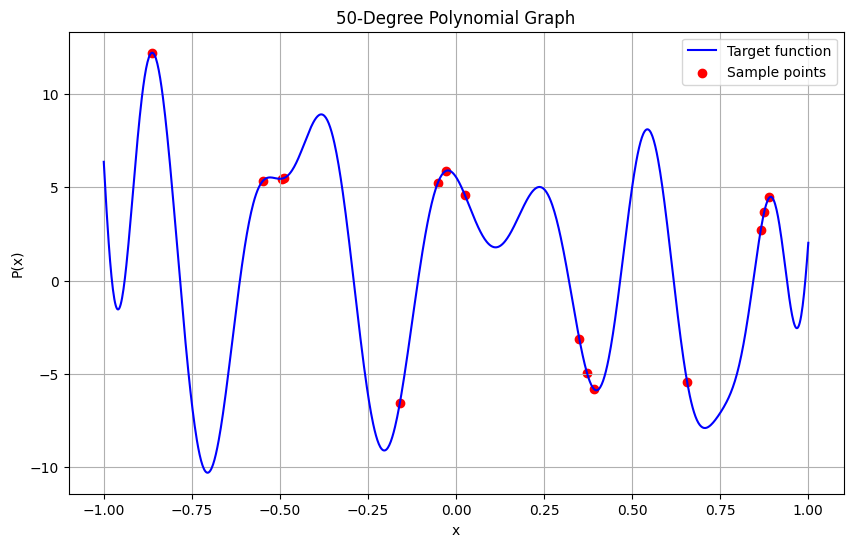

In [56]:
# Set a fixed seed value
seed_value = 30
random.seed(seed_value)

# Generate random y for a 50-degree polynomial
degree = 50
y_values = [random.uniform(-10, 10) for _ in range(degree)]
print(y_values)

# Generate x values for polyfit
x_values = np.linspace(-1.5, 1.5, len(y_values))

target_function = np.polyfit(x_values, y_values, 50)

# Generate x values for plotting
x_range = np.linspace(-1, 1, 1000)  # Adjust the range as needed
y_range = polynomial_predictions(x_range, target_function)

if not os.path.exists("data/50_degree_target_function.csv"):
    target_df = pd.DataFrame({'x':x_range, 'y':y_range})
    target_df.to_csv("data/50_degree_target_function.csv", index=False)

df = pd.read_csv("data/50_degree_target_function.csv")
x_range = df["x"]
y_range = df["y"]

# Sample point
x_15_sample = np.array([random.uniform(-1, 1) for _ in range(15)])
y_15_sample = polynomial_predictions(x_15_sample, target_function)

if not os.path.exists("data/50_degree_target_function_15sample.csv"):
    sample_df = pd.DataFrame({'x':x_15_sample, 'y':y_15_sample})
    sample_df.to_csv("data/50_degree_target_function_15sample.csv", index=False)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='Target function', color='blue')
plt.scatter(x_15_sample, y_15_sample, label='Sample points', color='red')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('50-Degree Polynomial Graph')
plt.legend()
plt.grid()
plt.show()

In [57]:
df = pd.read_csv("data/50_degree_target_function_15sample.csv")

w_list = []
degree_list = [2, 10]
for degree in degree_list:
    w = np.polyfit(df["x"], df["y"], degree)
    w_list.append(w)
    RMSE = cross_validation(df["x"], df["y"], FOLDS, degree)
    print(f'Degree = {degree} | RMSE_out = {RMSE:.4f}')
    RMSE_in = CalculateMSE_poly(df["x"], df["y"], w)**(1/2)
    print(f'Degree = {degree} | RMSE_in = {RMSE_in:.4f}')
label = ["2nd Order Fit", "10th Order Fit"]
model_plot2(df["x"], df["y"], w_list,label, [-15, 15])

Degree = 2 | RMSE_out = 4.2182
Degree = 2 | RMSE_in = 3.8418
Degree = 10 | RMSE_out = 993.9031
Degree = 10 | RMSE_in = 0.3096


# 2. เขียนโปรแกรมสำหรับการทำ Nested Cross-Validation และออกแบบการทดลองเพื่อแสดงให้เห็นถึงความจำเป็นของการทำสองลูปแทนที่จะทำเพียงแค่ลูปเดียว

## Nested Cross-Validation Program

In [7]:
def cross_validate_for_degree(x, y, folds, degree_list):
    best_degree = -1
    rmse_list = []
    for degree in degree_list:
        rmse_list.append(cross_validation(x, y, folds, degree))
    best_degree = degree_list[rmse_list.index(min(rmse_list))]
    return (rmse_list, best_degree)

def nested_cross_validation(X, y, folds, degree_list):
    k_folds = KFold(n_splits=folds)

    rmse_list = []

    for train_index, test_index in k_folds.split(X):
        X_train , X_test = X.iloc[train_index], X.iloc[test_index]
        y_train , y_test = y.iloc[train_index], y.iloc[test_index]

        degree = cross_validate_for_degree(X_train, y_train, min(len(X_train),folds), degree_list)[1]


        model = np.polyfit(X_train["x"].values.flatten(), np.array(y_train), degree)
        rmse_list.append(CalculateMSE(X_test["x"].values.flatten(), np.array(y_test), model)**(1/2))

    return np.average(rmse_list)

## การทดลอง

In [8]:
df = pd.read_csv("data/sin experiment/sin_noisy_20sample.csv")

y_name = list(df)[-1]

ref_x = np.linspace(-1,1,10000)
ref_y = np.sin(np.pi*ref_x)
ref_data = np.column_stack((ref_x,ref_y))
ref_df = pd.DataFrame(ref_data, columns=["x","y"])

train_results = {}
for degree in range(0,9):
    model = np.polyfit(ref_df["x"].values.flatten(), np.array(ref_df["y"]), degree)
    train_results[degree] = CalculateMSE(ref_df["x"].values.flatten(), np.array(ref_df["y"]), model)**(1/2)

cv_results = []
nested_results = []
delta_result = []
ref_errors = []
for i in range(10):
    new_df = df.sample(frac = 1, random_state=i, ignore_index=True)
    cv_errors, best_degree = cross_validate_for_degree(new_df["x"], new_df[y_name], 10, range(0,9))
    cv_result = min(cv_errors)
    nested_result = nested_cross_validation(new_df[["x"]], new_df[y_name], 10, range(0,9))

    cv_results.append(cv_result)
    nested_results.append(nested_result)
    ref_errors.append(train_results[degree])
    delta_result.append(nested_result - cv_result)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


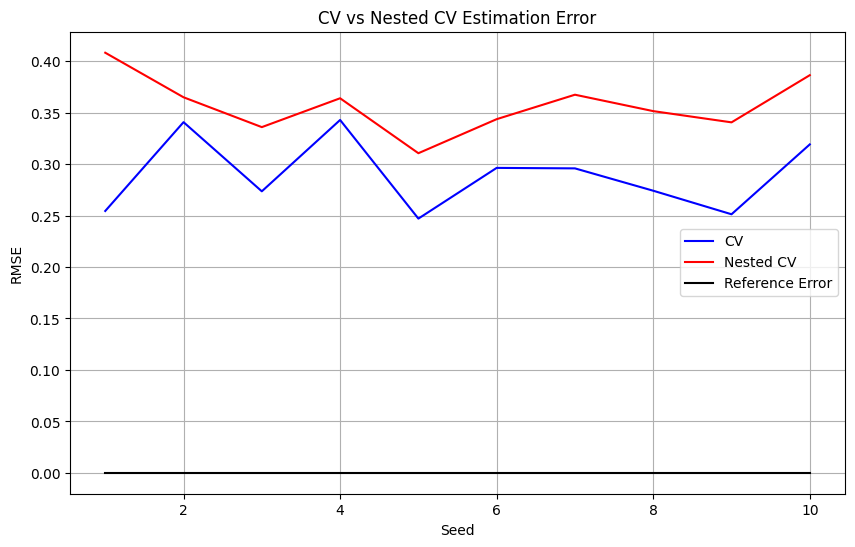

In [18]:
# Generate x values for plotting
x_values = np.linspace(1, 10, 10)  # Adjust the range as needed
print(x_values)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, cv_results, label='CV', color='blue')
plt.plot(x_values, nested_results, label='Nested CV', color='red')
plt.plot(x_values, ref_errors, label='Reference Error', color = 'black')
plt.xlabel('Seed')
plt.ylabel('RMSE')
plt.title('CV vs Nested CV Estimation Error')
plt.legend()
plt.grid()
plt.show()

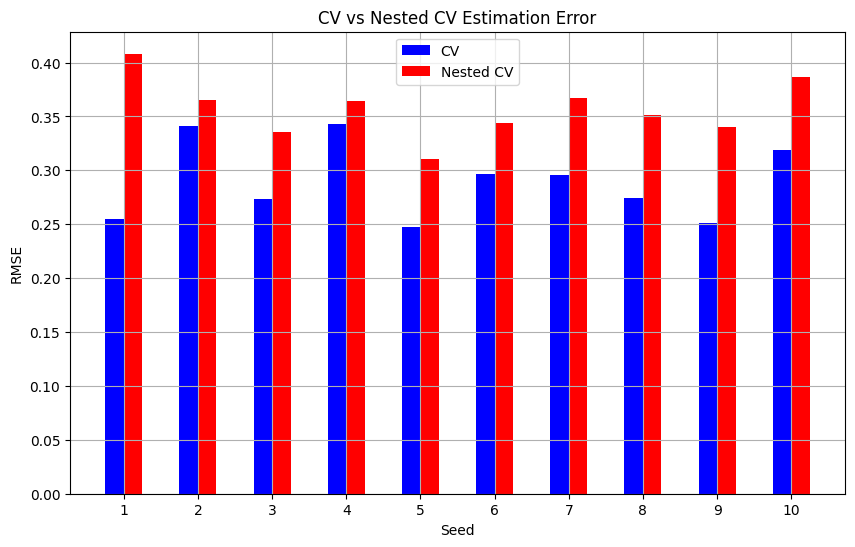

In [9]:
x_values = np.linspace(1, 10, 10)
plt.figure(figsize=(10, 6))

bar_width = 0.25

plt.bar(x_values - bar_width/2, cv_results, label='CV', color='blue', width=bar_width)
plt.bar(x_values + bar_width/2, nested_results, label='Nested CV', color='red', width=bar_width)
plt.xlabel('Seed')
plt.ylabel('RMSE')
plt.xticks(range(1,11))
plt.title('CV vs Nested CV Estimation Error')
plt.legend()
plt.grid()
plt.show()

In [10]:
SEEDS = 30

cv_results = []
nested_results = []
delta_result = []
chosen_degrees = []
ref_errors = []
for i in range(3,101):
    temp_cv_result = 0
    temp_nested_result = 0
    temp_delta_result = 0
    temp_chosen_degree = 0
    temp_train_result = 0
    temp_best_degree = 0
    for seed in range(SEEDS):
        new_x = np.random.uniform(-1,1,i)
        np.random.seed(seed)
        new_y = np.sin(np.pi*new_x) + np.random.normal(0, 0.2, i)
        new_data = np.column_stack((new_x,new_y))
        new_df = pd.DataFrame(new_data, columns=["x","y"])

        train_results = {}
        for degree in range(0,20):
            model = np.polyfit(new_df["x"].values.flatten(), np.array(new_df["y"]), degree)
            train_results[degree] = CalculateMSE(new_df["x"].values.flatten(), np.array(new_df["y"]), model)**(1/2)

        cv_errors, best_degree = cross_validate_for_degree(new_df["x"], new_df["y"], min(i,10), range(0,20))
        cv_result = min(cv_errors)
        nested_result = nested_cross_validation(new_df[["x"]], new_df["y"], min(i,10), range(0,20))

        temp_cv_result += cv_result
        temp_nested_result += nested_result
        temp_train_result += train_results[best_degree]
        temp_best_degree += best_degree

    cv_results.append(temp_cv_result/SEEDS)
    nested_results.append(temp_nested_result/SEEDS)
    ref_errors.append(temp_train_result/SEEDS)
    delta_result.append((temp_nested_result - cv_result)/SEEDS)
    chosen_degrees.append(round(temp_best_degree/SEEDS))

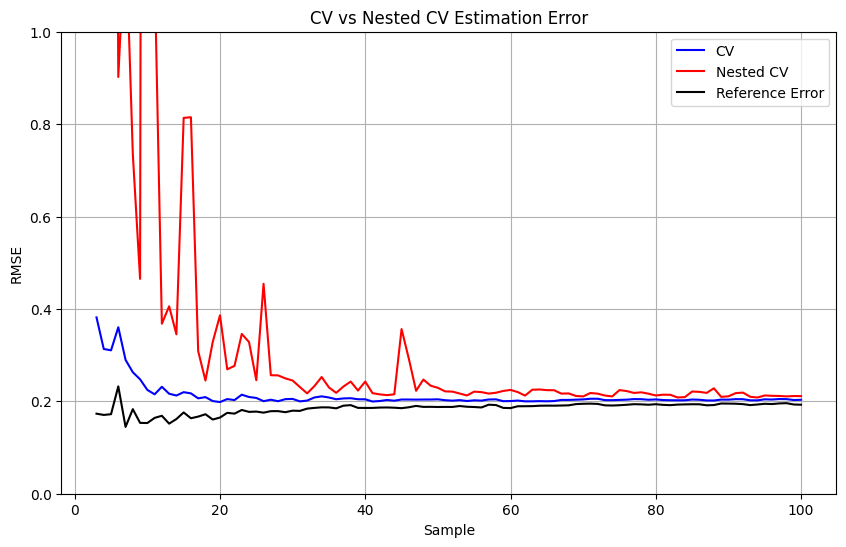

In [11]:
import matplotlib.pyplot as plt

# Generate x values for plotting
x_values = np.linspace(3, 100, 101-3)  # Adjust the range as needed

# Evaluate the polynomial for each x value

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, cv_results, label='CV', color='blue')
plt.plot(x_values, nested_results, label='Nested CV', color='red')
plt.plot(x_values, ref_errors, label='Reference Error', color = 'black')
plt.xlabel('Sample')
plt.ylabel('RMSE')
plt.ylim(0,1)
plt.title('CV vs Nested CV Estimation Error')
plt.legend()
plt.grid()
plt.show()

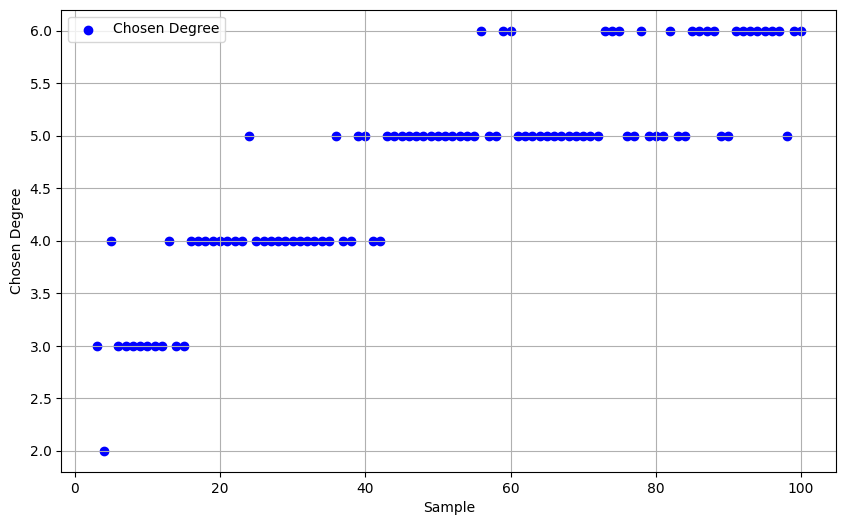

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x_values, chosen_degrees, label='Chosen Degree', color='blue')
plt.xlabel('Sample')
plt.ylabel('Chosen Degree')
plt.legend()
plt.grid()
plt.show()